# Tianyi Zhang 9598110243
----------------

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### a)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


In [4]:
import sys
import warnings

warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data_folder = '..\\data\\Anuran Calls (MFCCs)'

In [4]:
filename = os.path.join(data_folder,'Frogs_MFCCs.csv')

df = pd.read_csv(filename, header = 0)
print(df.head(5))

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [5]:
data = df.sample(frac=1).reset_index(drop=True)
print(data.head(5))

datatr, datate = train_test_split(data, test_size=0.3)
print(datatr.shape, datate.shape)

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.578343  0.387529  0.567998  0.190552  0.004060 -0.107670   
1       1.0  0.673930  0.308208  0.431332  0.321073  0.100332 -0.143374   
2       1.0  0.570986  0.423022  0.200043  0.045258  0.117523  0.008010   
3       1.0  0.154713  0.127864  0.588307  0.268080 -0.004269 -0.117376   
4       1.0  0.513914  0.310416  0.484653  0.118076  0.021559 -0.087905   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0  0.014123  0.208031  0.044684  ...  0.167365  0.004988 -0.053840 -0.093363   
1 -0.220256 -0.047391  0.255579  ... -0.150499 -0.171813 -0.023989  0.117805   
2 -0.037323  0.099172  0.032919  ... -0.008477  0.002976  0.038844 -0.008619   
3  0.136099  0.250138 -0.029540  ...  0.089143 -0.069926 -0.079712 -0.005897   
4  0.015783  0.229560  0.101129  ...  0.181692  0.059948 -0.022623 -0.120523   

   MFCCs_21  MFCCs_22           Family          Genus               

In [6]:
xtr = datatr.iloc[:, :-4]
ytr = datatr.iloc[:, -4:-1]
xte = datate.iloc[:, :-4]
yte = datate.iloc[:, -4:-1]

print("training dataset shape:", xtr.shape, ytr.shape)
print("test dataset shape:", xte.shape, yte.shape)

training dataset shape: (5036, 22) (5036, 3)
test dataset shape: (2159, 22) (2159, 3)


### b)

#### 1)

**With sklearn, I will use metrics.accuracy_score(y_true, y_pred) to evaluate in an exact match way. And I will use metrics.hamming_loss(y_true, y_pred) to evaluate with the hamming loss.**

#### 2)

**For raw data:**

In [7]:
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [8]:
svcParameters = {"gamma": np.linspace(0.3, 3, 10), "C": np.logspace(-3, 6, 10)}

In [9]:
print("For raw dataset:")
for label in range(ytr.shape[1]):
    y_tr = ytr.iloc[:, label]
    y_te = yte.iloc[:, label]

    svc = SVC(kernel="rbf", decision_function_shape='ovr')
    
    gridCV = GridSearchCV(svc, svcParameters, cv=10, n_jobs=-1)
    gridCV.fit(xtr, y_tr)

    bestClf = gridCV.best_estimator_

    prediction = bestClf.predict(xte)
    
    print("--------------------")
    print("label:", ytr.columns[label])
    print("The best parameters: ", gridCV.best_params_)

    print("The score: ", accuracy_score(y_te, prediction))

    print("The hamming loss: ", hamming_loss(y_te, prediction))

For raw dataset:
--------------------
label: Family
The best parameters:  {'C': 100.0, 'gamma': 2.7}
The score:  0.9944418712366836
The hamming loss:  0.00555812876331635
--------------------
label: Genus
The best parameters:  {'C': 100.0, 'gamma': 1.8000000000000003}
The score:  0.9902732746641963
The hamming loss:  0.009726725335803613
--------------------
label: Species
The best parameters:  {'C': 10.0, 'gamma': 1.8000000000000003}
The score:  0.9893469198703103
The hamming loss:  0.010653080129689671


**For standardized data:**

In [10]:
std_svcParameters = {"svc__gamma": np.linspace(0.3, 3, 10), "svc__C": np.logspace(-3, 6, 10)}

In [11]:
print("For standardized dataset:")
for label in range(ytr.shape[1]):
    y_tr = ytr.iloc[:, label]
    y_te = yte.iloc[:, label]

    std_svc = make_pipeline(StandardScaler(), SVC(kernel="rbf", decision_function_shape='ovr'))
    std_gridCV = GridSearchCV(std_svc, std_svcParameters, cv=10, n_jobs=-1)
    std_gridCV.fit(xtr, y_tr)

    bestClf_std = std_gridCV.best_estimator_

    prediction_std = bestClf_std.predict(StandardScaler().fit(xte).transform(xte))

    print("--------------------")
    print("label:", ytr.columns[label])
    print("The best parameters: ", std_gridCV.best_params_)

    print("The score: ", accuracy_score(y_te, prediction_std))

    print("The hamming loss: ", hamming_loss(y_te, prediction_std))

For standardized dataset:
--------------------
label: Family
The best parameters:  {'svc__C': 10.0, 'svc__gamma': 0.3}
The score:  0.29272811486799444
The hamming loss:  0.7072718851320056
--------------------
label: Genus
The best parameters:  {'svc__C': 10.0, 'svc__gamma': 0.3}
The score:  0.21491431218156554
The hamming loss:  0.7850856878184345
--------------------
label: Species
The best parameters:  {'svc__C': 10.0, 'svc__gamma': 0.3}
The score:  0.14960629921259844
The hamming loss:  0.8503937007874016


#### 3)

In [12]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

In [13]:
l1_parameters = {"linearsvc__C": np.logspace(-3, 6, 10)}

In [14]:
print("With L1-penalized:")
for label in range(ytr.shape[1]):
    y_tr = ytr.iloc[:, label]
    y_te = yte.iloc[:, label]
    
    l1_scv = make_pipeline(StandardScaler(), LinearSVC(penalty="l1", multi_class='ovr', dual=False))
    gridCV = GridSearchCV(l1_scv, l1_parameters, cv=10, n_jobs=-1)
    gridCV.fit(xtr, y_tr)

    bestClf = gridCV.best_estimator_
    prediction = bestClf.predict(StandardScaler().fit(xte).transform(xte))

    print("--------------------")
    print("label:", ytr.columns[label])
    print("The best parameters: ", gridCV.best_params_)

    print("The score: ", accuracy_score(y_te, prediction))

    print("The hamming loss: ", hamming_loss(y_te, prediction))

With L1-penalized:
--------------------
label: Family
The best parameters:  {'linearsvc__C': 10.0}
The score:  0.7684113015284854
The hamming loss:  0.2315886984715146
--------------------
label: Genus
The best parameters:  {'linearsvc__C': 10.0}
The score:  0.7443260768874479
The hamming loss:  0.2556739231125521
--------------------
label: Species
The best parameters:  {'linearsvc__C': 1000.0}
The score:  0.8675312644742936
The hamming loss:  0.13246873552570634


#### 4)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
print("After using SMOTE to remedy class imbalance:")
for label in range(ytr.shape[1]):
    y_tr = ytr.iloc[:, label]
    y_te = yte.iloc[:, label]
    
    smote = SMOTE()
    smote_xtr, smote_ytr = smote.fit_sample(xtr, y_tr)
#     smote_xte, smote_yte = smote.fit_sample(xte, y_te)

    l1_scv = make_pipeline(StandardScaler(), LinearSVC(penalty="l1", multi_class='ovr', dual=False))
    gridCV = GridSearchCV(l1_scv, l1_parameters, cv=10, n_jobs=-1)
    gridCV.fit(smote_xtr, smote_ytr)

    bestClf = gridCV.best_estimator_
    prediction = bestClf.predict(xte)

    print("--------------------")
    print("label:", ytr.columns[label])
    print("The best parameters: ", gridCV.best_params_)

    print("The score: ", accuracy_score(y_te, prediction))

    print("The hamming loss: ", hamming_loss(y_te, prediction))

After using SMOTE to remedy class imbalance:
--------------------
label: Family
The best parameters:  {'linearsvc__C': 1.0}
The score:  0.9226493747105141
The hamming loss:  0.07735062528948587
--------------------
label: Genus
The best parameters:  {'linearsvc__C': 1000.0}
The score:  0.9184807781380269
The hamming loss:  0.08151922186197313
--------------------
label: Species
The best parameters:  {'linearsvc__C': 100000.0}
The score:  0.9504400185270959
The hamming loss:  0.04955998147290412


#### 5)

#### 6)

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### a)

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [18]:
x = data.iloc[:, :-4]

In [26]:
scores = []
bestK = []

for i in range(50):
    temp_score = []
    
    for k in range(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=i)
        cluster = kmeans.fit_predict(x)
        
        temp_score.append(silhouette_score(x, cluster))

    temp_bestK = np.argmax(temp_score) + 2
    bestK.append(temp_bestK)
    scores.append(max(temp_score))

In [28]:
print("the best K in 50 loops:", bestK)

the best K in 50 loops: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


### b)

In [42]:
from collections import Counter

In [43]:
y = data.iloc[:, -4:-1]

In [44]:
hamming_loss = []
distance = []

for i in range(50):
    kmeans = KMeans(n_clusters=4, random_state=i)
    cluster = kmeans.fit_predict(x)
    y["prediction"] = cluster

    majority = {}
    
    for index in range(4):
        true_label = y[y["prediction"] == index]
        temp = {}
        for column in y.columns:
            temp[column] = Counter(true_label[column]).most_common(1)[0][0]
        majority[index] = temp
        
    number = 0
    for index in range(4):
        true_label = y[y["prediction"] == index]
        for column in y.columns:
            number += sum(true_label[column] != majority[index][column])
    loss = number / (y.shape[0] * 3)
    hamming_loss.append(loss)
    
    distance.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    print("--------------------")
    print("In loop {}:".format(i+1))
    print("the majority:", majority)
    

--------------------
In loop 1:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 0}, 1: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata', 'prediction': 1}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens', 'prediction': 2}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 3}}
--------------------
In loop 2:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 0}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 1}, 2: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata', 'prediction': 2}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens', 'prediction': 3}}
--------------------
In loop 3:
the majority: {0: {'Family': 'Hylidae', 'Genus': 'Hyps

--------------------
In loop 19:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 0}, 1: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata', 'prediction': 1}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 2}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens', 'prediction': 3}}
--------------------
In loop 20:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre', 'prediction': 0}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 1}, 2: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 2}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 3}}
--------------------
In loop 21:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus'

--------------------
In loop 37:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 0}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre', 'prediction': 1}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 2}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens', 'prediction': 3}}
--------------------
In loop 38:
the majority: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus', 'prediction': 0}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens', 'prediction': 1}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae', 'prediction': 2}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata', 'prediction': 3}}
--------------------
In loop 39:
the majority: {0: {'Family': 'Dendrobatidae', 'Genus

### c)

In [45]:
print("--------------------")
print("The average Hamming distance:", np.average(distance))
print("The average Hamming loss:", np.average(hamming_loss))
print("The average Hamming score:", np.average(1 - np.array(hamming_loss)))


--------------------
The average Hamming distance: 0.44879306587477913
The average Hamming loss: 0.22416400277970816
The average Hamming score: 0.7758359972202917


## 3. ISLR 10.7.2

![](https://user-images.githubusercontent.com/18362787/87218292-2f5c0000-c306-11ea-84a7-df1a203e21ef.jpg)

### a)

In [12]:
from scipy.cluster import hierarchy


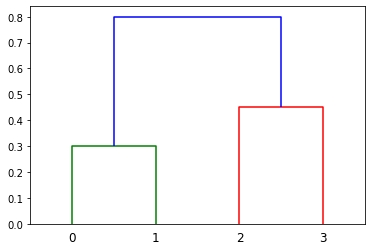

In [13]:
matrix = np.array([0.3, 0.4, 0.7, 0.5, 0.8, 0.45])

Z = hierarchy.linkage(matrix, 'complete')
dn = hierarchy.dendrogram(Z)
plt.show()

### b)

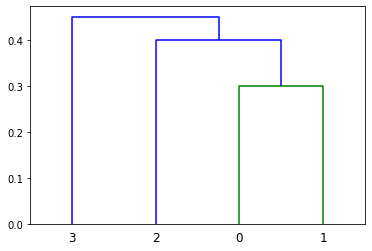

In [14]:
Z = hierarchy.linkage(matrix, 'single')
dn = hierarchy.dendrogram(Z)
plt.show()

### c)

**observation 0 and 1 will be in the first cluster. Then, observation 2 and 3 will be in the second cluster.**

### d)

**observation 3 will be in the first cluster. observation 0, 1 and 2 will be in the second cluster.**

### e)

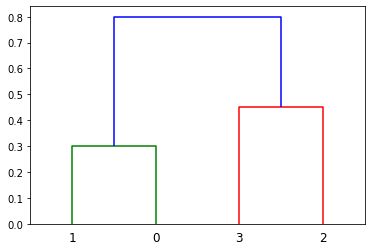

In [15]:
Z = hierarchy.linkage(matrix, 'complete')
dn = hierarchy.dendrogram(Z, labels=[1,0,3,2])
plt.show()